In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as pl

In [ ]:
x=pd.read_csv("IndianCars_Final.csv",index_col=0)

# ***Univariate Analysis***

# ***Understand Dataset and Data Cleaning*** :-

I have already cleaned the dataset and adjusted the null value in a separate columnary file, and I am now using the clean dataset as an input dataset for this task.



In [ ]:
x.shape

(1276, 139)

# ***Data Types***

In [ ]:
x.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Data columns (total 139 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Car Name                                   object 
 1    Variant                                    object 
 2    Ex-Showroom_Price                          int64  
 3    Displacement                               object 
 4    Cylinders                                  object 
 5    Valves_Per_Cylinder                        float64
 6    Drivetrain                                 object 
 7    Cylinder_Configuration                     object 
 8    Emission_Norm                              object 
 9    Engine_Location                            object 
 10   Fuel_System                                object 
 11   Fuel_Tank_Capacity                         object 
 12   Fuel_Type                                  object 
 13   Height                         

# ***Descriptive Statistics***

In [ ]:
x.describe()

,Ex-Showroom_Price,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1.276000e+03,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,4.596538e+06,3.979624,4.548589,5.268809,3.703762,1.018025
std,1.214735e+07,0.799740,0.747276,1.142683,2.397388,0.164699
min,2.364470e+05,1.000000,2.000000,2.000000,1.000000,1.000000
25%,7.438760e+05,4.000000,4.000000,5.000000,2.000000,1.000000
50%,1.060064e+06,4.000000,5.000000,5.000000,2.000000,1.000000
75%,2.979828e+06,4.000000,5.000000,5.000000,6.000000,1.000000
max,2.121554e+08,16.000000,5.000000,16.000000,14.000000,3.000000


# ***Histogram of Numeric variables***

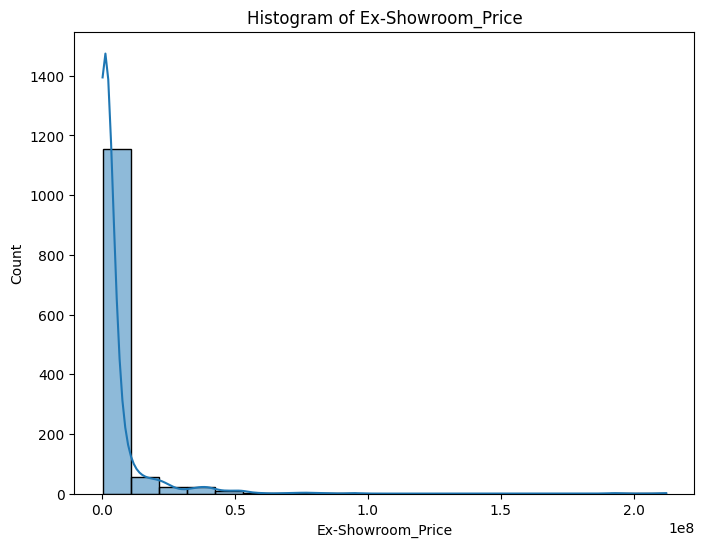

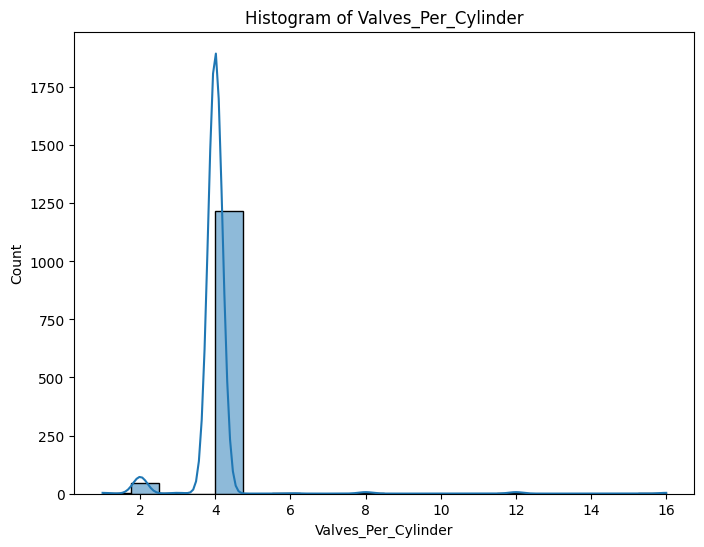

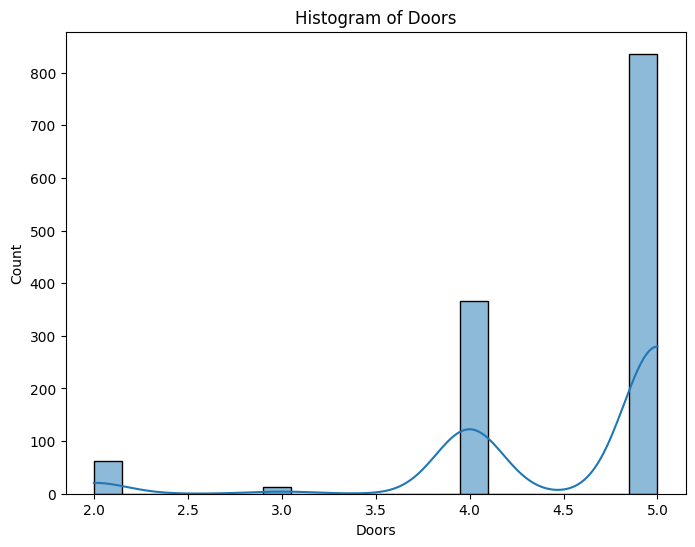

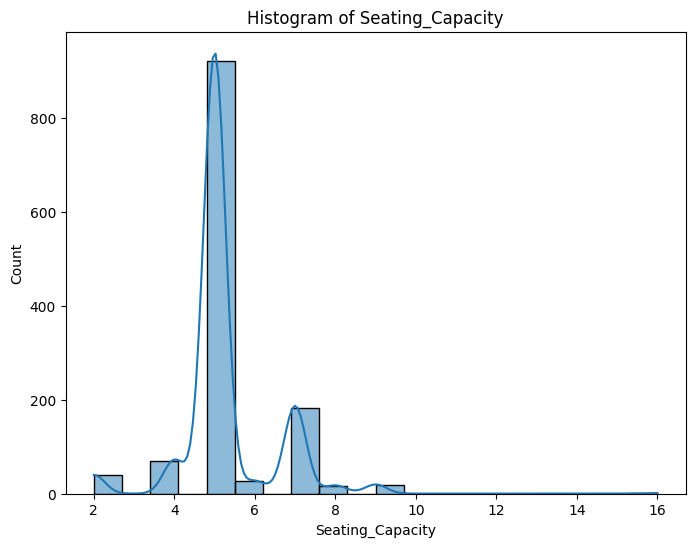

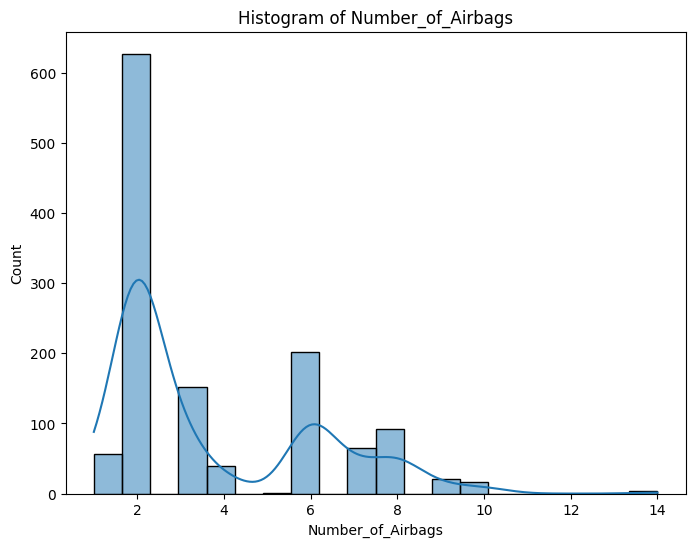

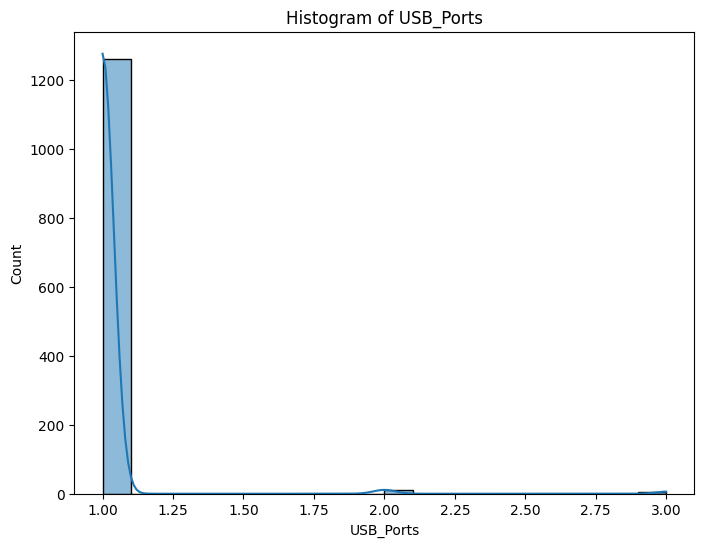

In [ ]:
numeric_cols = x.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(x[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# ***Bar Chart for Categorical Variable***

Car Name (For adjusting data i have combined car model and manufacture as a single column while cleaning dataset)

In [ ]:
import plotly.express as px
fig = px.bar(x['Car Name'].value_counts().reset_index(), x='Car Name', y='index', orientation='h',
             title='Count of Cars by Car Name', labels={'Car Name': 'Count', 'index': 'Car Name'})
fig.show()

# ***Box Plots for Numeric Variables***

In [ ]:
for col in numeric_cols:
    fig = px.box(x, y=col, title=f'Box Plot of {col}')
    fig.show()


# ***Pie Chart for Car Models***
For better visualization i have taken top 50 models

In [ ]:
fig = px.pie(x['Car Name'].value_counts().head(10), names=x['Car Name'].value_counts().head(50).index, title='Top Car Models Distribution')
fig.show()

# ***Count Plot for Categorical Variables***

I have plotted a count plot for three categorical variables, engine location and car model,body type among the entire dataset.
For better visualization, I have taken the top 30 models for the car model count plot.

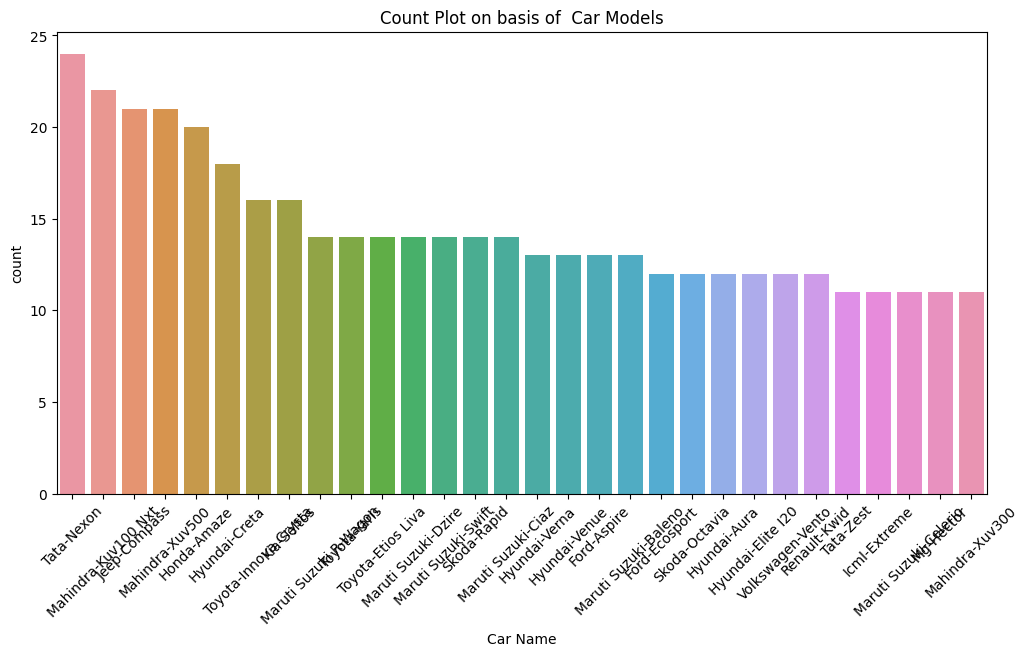

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Car Name', data=x, order=x['Car Name'].value_counts().head(30).index)
plt.title('Count Plot on basis of  Car Models')
plt.xticks(rotation=45)
plt.show()

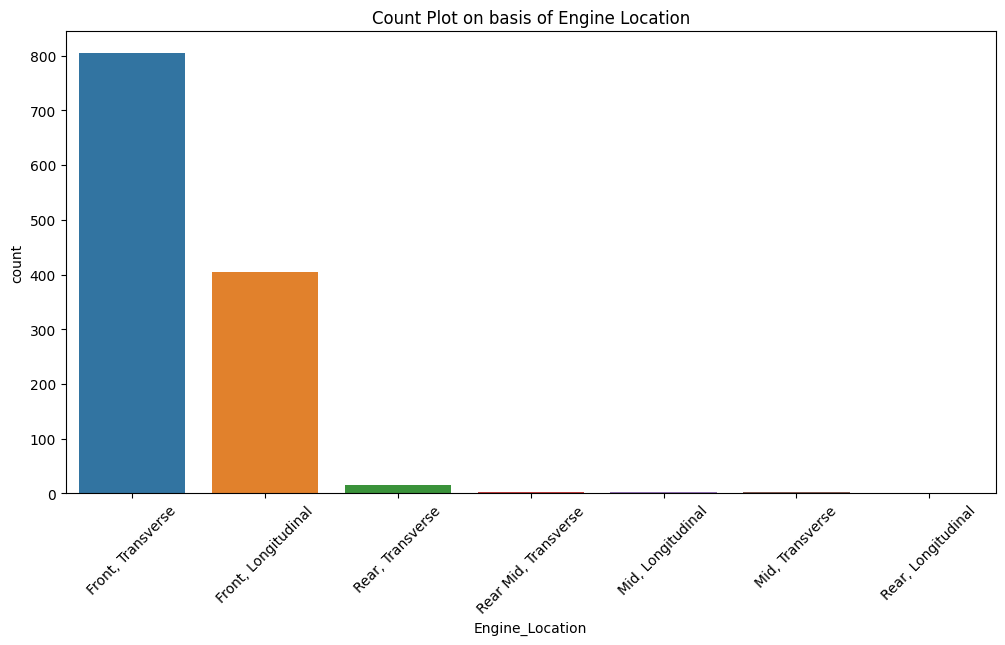

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Engine_Location', data=x, order=x['Engine_Location'].value_counts().index)
plt.title('Count Plot on basis of Engine Location')
plt.xticks(rotation=45)
plt.show()

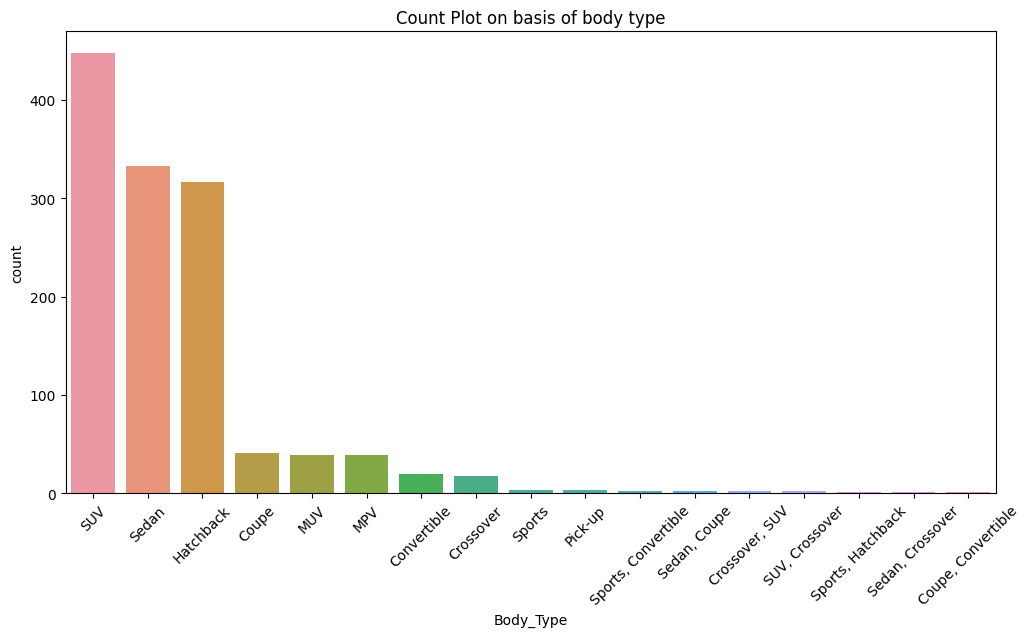

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Body_Type', data=x, order=x['Body_Type'].value_counts().index)
plt.title('Count Plot on basis of body type')
plt.xticks(rotation=45)
plt.show()

# ***Bivariate Analysis***

# ***Correlation Matrix for Numeric Variables***

Text(0.5, 1.0, 'Correlation Matrix of Numeric Variables')

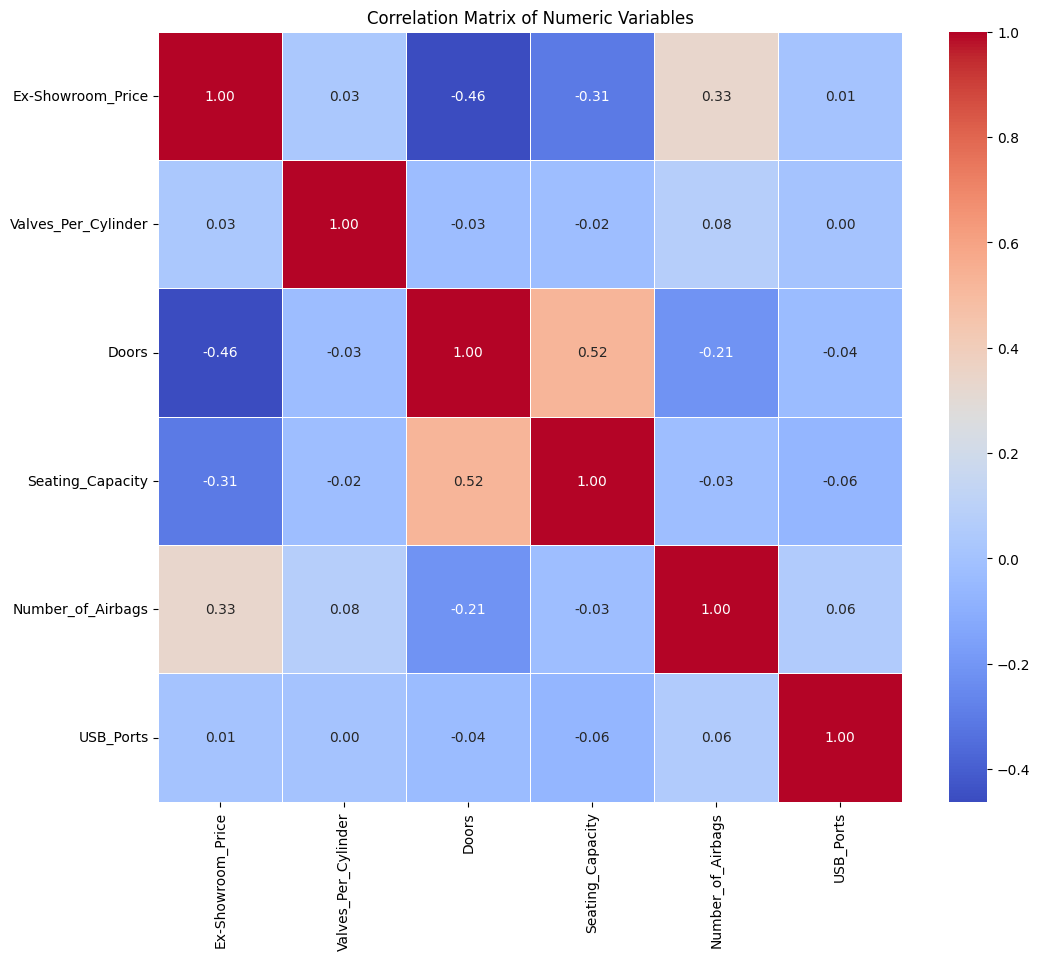

In [ ]:
correlation_matrix = x[numeric_cols].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')

# ***Scatter Plots for  understanding relationship between two numeric variables***

For visualizing, I have plotted the ex-showroom price and seating capacity.

In [ ]:
fig = px.scatter(x, x='Seating_Capacity', y='Ex-Showroom_Price', title='Scatter Plot of Seating_capacity vs. Ex-Showroom Price')
fig.show()

# ***Pair Plot for understanding relationship between multiple numeric variables***

In [ ]:
fig = px.scatter_matrix(x[numeric_cols], title='Pair Plot of Numeric Variables')
fig.show()

# ***Bar Charts with Hue for categorical variables***

In [ ]:
fig = px.bar(x, x='Body_Type', y='Ex-Showroom_Price', color='Fuel_Type', title='Bar Chart of Ex-showroom_Price by Body Type with Fuel Type Hue')
fig.show()

# ***Joint Plots For Numerical Variables***

In [ ]:
fig = px.scatter(x, x='Ex-Showroom_Price', y='Seating_Capacity', title='Joint Plot of Ex-Showroom Price vs. Seating Capacity')
fig.show()


# ***Box Plots with Hue for catergorical variables***

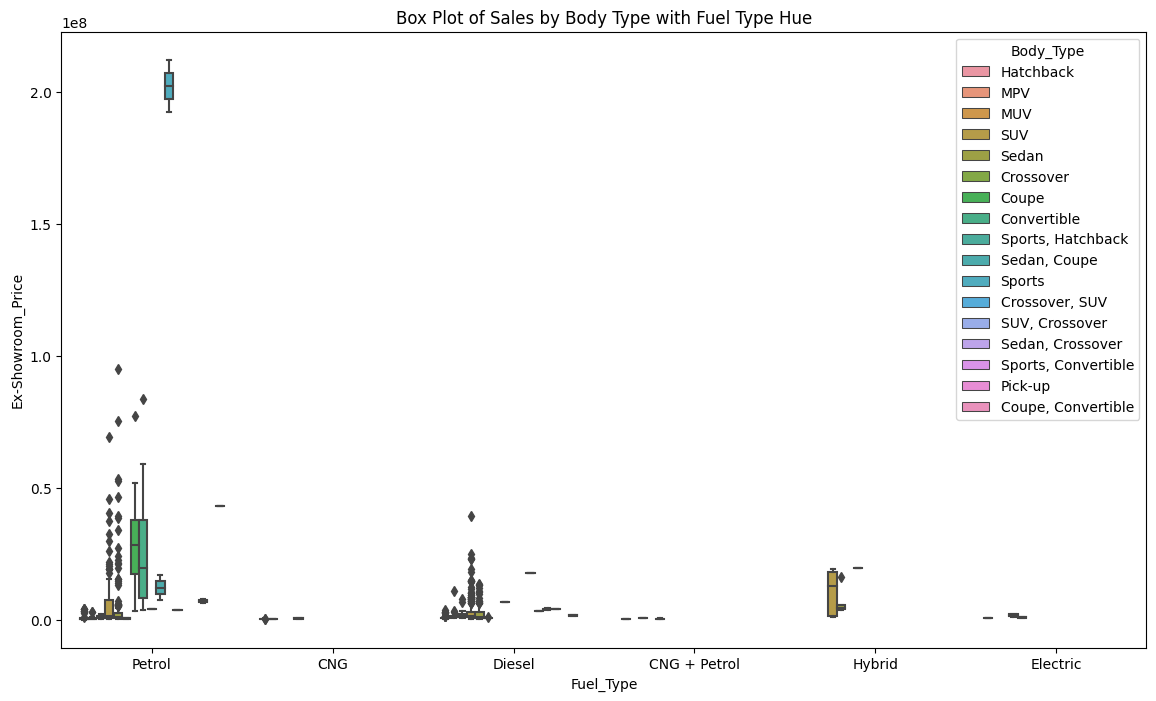

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Fuel_Type', y='Ex-Showroom_Price', hue='Body_Type', data=x)
plt.title('Box Plot of Sales by Fuel Type with Body Type Hue')
plt.show()

# ***Categorical Plots for understanding relation between two numeric variables***

In [ ]:
fig = px.bar(x, x='Number_of_Airbags', y='Ex-Showroom_Price', title='Categorical Plot of Ex-showroom Price by Number_of_Airbags')
fig.show()

# ***Violin Plots for numerical variables across diffrent categories***

In [ ]:
fig = px.violin(x, x='Body_Type', y='Ex-Showroom_Price', color='Fuel_Type', box=True, title='Violin Plot of Sales by Body Type with Fuel Type')
fig.show()

# ***Stacked Bar Charts for different categories***

In [ ]:
fig = px.bar(x, x='Body_Type', color='Fuel_Type', title='Stacked Bar Chart of Body Type with Fuel Type Contribution')
fig.show()
fig = px.bar(x, x='Car Name', color='Body_Type', title='Stacked Bar Chart of Car Model with Body Type')
fig.show()

# ***Key Insights***

***Below are some key insights I have gained after analyzing both the analyses above***

***
1. The engine is typically located at the front and transverse of most Indian automobiles.
2. The Tata Nexon has a comparable maximum number of versions as other cars.
3. SUVs outnumber sedans and hatchbacks in terms of vehicle count.
4. Diesel-powered SUVs outperform all other fuel kinds.
5. The Indian vehicle industry has an average seating capacity of five.
***

The insights shown above are based on data that I examined for analysis among various columns in the overall dataset




